# RESUME_cATEGORIZER

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df 

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [4]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [5]:
df.shape

(962, 2)

- Data Cleaning

In [6]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

- no null values 
- lower case all the data and remove special characters 

In [7]:
df.rename(columns={'Category' : 'Job-Profile'} , inplace=True )  

In [8]:
df.columns

Index(['Job-Profile', 'Resume'], dtype='object')

In [9]:
df['Job-Profile'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [10]:
df['Job-Profile'] = df['Job-Profile'].apply(lambda x:x.lower())  

In [12]:
print(df['Job-Profile'].unique())
print('\n\nTotal number of Job Profiles' , len(df['Job-Profile'].unique()))

['data science' 'hr' 'advocate' 'arts' 'web designing'
 'mechanical engineer' 'sales' 'health and fitness' 'civil engineer'
 'java developer' 'business analyst' 'sap developer' 'automation testing'
 'electrical engineering' 'operations manager' 'python developer'
 'devops engineer' 'network security engineer' 'pmo' 'database' 'hadoop'
 'etl developer' 'dotnet developer' 'blockchain' 'testing']


Total number of Job Profiles 25


In [13]:
import string as str1


def clean_resume(resume_of_employees):
    resume_of_employees = resume_of_employees.lower() 
    cleaned_str = ''
    for i in resume_of_employees:
        if (i not in str1.punctuation) and (i not in '\t\n\r\x0b\x0c'):
            cleaned_str += i 
    
    return cleaned_str

In [15]:
df['Resume'] = df['Resume'].apply(clean_resume)

In [16]:
df['Resume'][0] 

'skills  programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery  machine learning regression svm naã¯ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca  neural nets  database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau  others regular expression html css angular 6 logstash kafka python flask git docker computer vision  open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate  ernst  young llpskill details javascript exprience  24 monthsjquery exprience  24 monthspython exprience  24 monthscompany details company  ernst  young llpdescription  fraud investigations and dispute services   assurancetechnology assisted reviewtar technology assisted review assists in accelerati

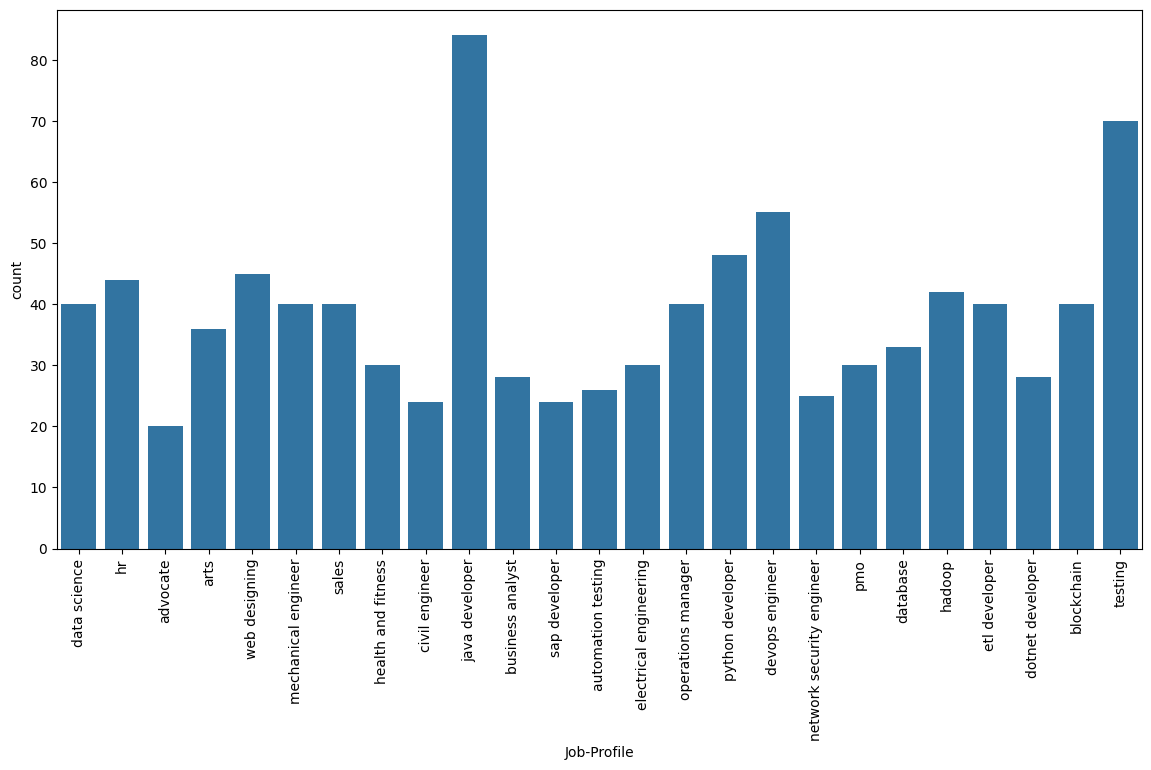

In [17]:
plt.figure(figsize = [14,7])
sns.countplot(x =df['Job-Profile'])
plt.xticks(rotation=90)
plt.show()


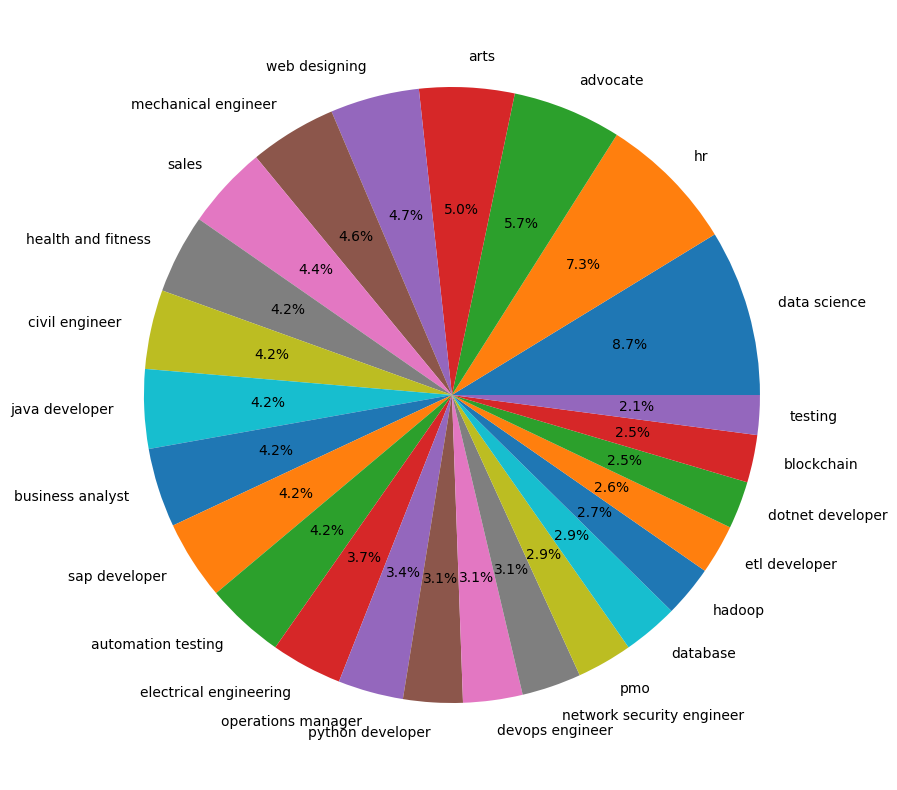

In [18]:
counts= df['Job-Profile'].value_counts()
labels= df['Job-Profile'].unique()
plt.figure(figsize=(15,10)) 
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

 module is used to convert a collection of text documents (in this case, resumes) into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. This is a common technique in Natural Language Processing (NLP) to transform text into numerical features that can be used for machine learning algorithms

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer (stop_words='english') 

tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

In [21]:
for i in list(requiredText):
    print(i)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 325 stored elements and shape (1, 10459)>
  Coords	Values
  (0, 238)	0.07480134798608755
  (0, 467)	0.0479582317760018
  (0, 504)	0.032223014986667846
  (0, 532)	0.0318399198514725
  (0, 577)	0.0479582317760018
  (0, 611)	0.03031972489357263
  (0, 772)	0.1563887312326917
  (0, 788)	0.0812774430435877
  (0, 791)	0.13506069684250296
  (0, 793)	0.0479582317760018
  (0, 799)	0.021702419718163838
  (0, 822)	0.027112275516083143
  (0, 833)	0.0479582317760018
  (0, 838)	0.03858373723988598
  (0, 988)	0.0479582317760018
  (0, 1022)	0.08383681392723893
  (0, 1024)	0.03129896766294595
  (0, 1025)	0.07908505048175159
  (0, 1026)	0.07007979880543237
  (0, 1034)	0.07546342963351331
  (0, 1035)	0.0479582317760018
  (0, 1113)	0.028428701106073682
  (0, 1116)	0.039048140406747193
  (0, 1243)	0.016220551110630914
  (0, 1264)	0.08383681392723893
  :	:
  (0, 9526)	0.03752812220441638
  (0, 9580)	0.09796687711321414
  (0, 9591)	0.19291868619942

In [22]:
len(list(requiredText))

962

In [23]:
df['Category'] = df['Job-Profile'] 

In [27]:
df['Category'].unique()

array(['data science', 'hr', 'advocate', 'arts', 'web designing',
       'mechanical engineer', 'sales', 'health and fitness',
       'civil engineer', 'java developer', 'business analyst',
       'sap developer', 'automation testing', 'electrical engineering',
       'operations manager', 'python developer', 'devops engineer',
       'network security engineer', 'pmo', 'database', 'hadoop',
       'etl developer', 'dotnet developer', 'blockchain', 'testing'],
      dtype=object)

module is used to convert categorical text data into numerical labels

In [28]:
from sklearn.preprocessing import LabelEncoder 

label_encode = LabelEncoder() 

label_encode.fit(df['Job-Profile'])

df['Job-Profile'] = label_encode.transform(df['Job-Profile'])


In [29]:
for i in range(len(df['Category'].unique())):
    print(df['Category'].unique()[i] , " ==> " ,  df['Job-Profile'].unique()[i]  )

data science  ==>  6
hr  ==>  14
advocate  ==>  0
arts  ==>  1
web designing  ==>  24
mechanical engineer  ==>  16
sales  ==>  21
health and fitness  ==>  13
civil engineer  ==>  5
java developer  ==>  15
business analyst  ==>  4
sap developer  ==>  22
automation testing  ==>  2
electrical engineering  ==>  10
operations manager  ==>  18
python developer  ==>  20
devops engineer  ==>  8
network security engineer  ==>  17
pmo  ==>  19
database  ==>  7
hadoop  ==>  12
etl developer  ==>  11
dotnet developer  ==>  9
blockchain  ==>  3
testing  ==>  23


- Model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(requiredText , df['Job-Profile'] , test_size=0.2, random_state=42)

In [33]:
X_train.shape

(769, 10459)

In [34]:
X_test.shape

(193, 10459)

In [35]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [36]:
ypred = clf.predict(X_test)
print (accuracy_score(y_test,ypred))

0.9585492227979274


In [38]:
testing_resume =df['Resume'][10]
testing_resume = clean_resume(testing_resume) 
testing_resume 

'skills  programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery  machine learning regression svm naã¯ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca  neural nets  database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau  others regular expression html css angular 6 logstash kafka python flask git docker computer vision  open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate  ernst  young llpskill details javascript exprience  24 monthsjquery exprience  24 monthspython exprience  24 monthscompany details company  ernst  young llpdescription  fraud investigations and dispute services   assurancetechnology assisted reviewtar technology assisted review assists in accelerati

In [40]:
category_mapping_for_different_job_profiles = {
    0:'Advocate',
    1:'Arts', 
    2:'Automation Testing',
    3:'Blockchain',
    4:'Business Analyst',
    5:'Civil Engineer',
    6:'Data Science',
    7:'Database',
    8:'DevOps Engineer',
    9:'DotNet Developer',
    10:'ETL Developer', 
    11:'Electrical Engineering',
    12: 'HR',
    13:'Hadoop',
    14:'Health and fitness',  
    15:'Java Developer',
    16:'Mechanical Engineer',
    17:'Network Security Engineer',
    18:'Operations Manager',
    19:'PMO', 
    20:'Python Developer', 
    21:'SAP Developer', 
    22:'Sales',
    23:'Testing',
    24:'Web Designing',
}

In [41]:
def predict_the_resume_category(testing_resume):
    testing_resume = clean_resume(testing_resume)
    input_features = tfidf.transform([testing_resume]) 
    predicted_id = clf.predict(input_features)[0]
    category_name = category_mapping_for_different_job_profiles.get( predicted_id , 'Unknown')
    return f'Your resume is best suited for the Job Profile of {category_name}'

In [42]:
predict_the_resume_category(testing_resume)

'Your resume is best suited for the Job Profile of Data Science'

In [43]:
testing_resume =df['Resume'][200]
testing_resume = clean_resume(testing_resume) 
testing_resume 

'education details may 1999 to september 2002 diploma mechanical engg mumbai maharashtra institute of mechanical enggmay 1998 to may 1999 diploma mechanical engg services  itesmay 1993 to may 1995   mumbai maharashtra industrial training institutesr executivemechanical engineering automation  projects consultant sr executivemechanical engineering automation  projects consultant  mechanical engineeringskill details microsoft office word excelauto cadmicro station j erp 3d modeling software exprience  120 monthscompany details company  mechanical engineeringdescription  role  responsibilities  application engineering  pre sales  inside sales â\x80¢ provide applications support to inside sales personnel and outside sales channels provide product selection and materials of construction technical recommendationsâ\x80¢ participate in the necessary training activities to establish technical competency  also participate in field service trips as directed by top mgmtâ\x80¢ assist brand managers

In [44]:
predict_the_resume_category(testing_resume)

'Your resume is best suited for the Job Profile of Mechanical Engineer'